In [1]:
#***********************************************************************************
#6.1.4 - Generate Random Latitudes and Longitudes
#***********************************************************************************

In [2]:
#*****
#6.1.4
#*****

# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#*****
#6.1.4
#*****

# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-40.72359742840806, 148.3635042309785),
 (53.52325064157998, -154.2502813021648),
 (-63.59776285844131, 151.19331798320536),
 (-33.35894602636084, 59.28549785673815),
 (45.95456171369577, 57.109797135186),
 (-28.71698400969496, 13.567295923162845),
 (-82.41742922476993, -105.74435210035058),
 (50.599832633401405, 156.21546120163788),
 (-29.18568240446009, 41.60212852104428),
 (-35.40702403089584, 91.13352458598746),
 (58.713669979886845, 92.27082465074943),
 (27.612972707357983, -42.315531156034154),
 (-15.497026197541459, -139.33547650401047),
 (87.70167127171149, -120.915533198803),
 (-69.81333407425521, -52.127265240935856),
 (13.338842442102361, -89.9400559530446),
 (-60.76422233255696, 141.57174859169817),
 (-29.603056160895648, 59.462280813372814),
 (11.686704868051166, 39.45286130322057),
 (37.636243172795844, -35.38772417176972),
 (45.35766686246657, 128.36325093834506),
 (73.20073989279226, -48.51964507076627),
 (7.683764592652182, -52.86500282455536),
 (3.541484066524305, 9

In [5]:
#***********************************************************************************
#6.1.5 - Generate Random World Cities
#***********************************************************************************

In [6]:
#*****
#6.1.5
#*****

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
#*****
#6.1.5
#*****
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

launceston au
kodiak us
hobart au
saint-philippe re
beyneu kz
luderitz na
punta arenas cl
severo-kurilsk ru
beloha mg
busselton au
yeniseysk ru
ribeira grande pt
atuona pf
tuktoyaktuk ca
ushuaia ar
acajutla sv
hobart au
saint-philippe re
lalibela et
ribeira grande pt
weihe cn
ilulissat gl
mana gf
banda aceh id
jamestown sh
ushuaia ar
comodoro rivadavia ar
pevek ru
bethel us
pemangkat id
saint-pierre pm
fort nelson ca
port alfred za
nanortalik gl
barrow us
port elizabeth za
ulladulla au
umm durman sd
vilyuysk ru
upernavik gl
tuktoyaktuk ca
bredasdorp za
kodiak us
danjiangkou cn
speightstown bb
mataura pf
georgetown sh
elk plain us
asosa et
hermanus za
puerto ayora ec
bonito br
east london za
narsaq gl
castro cl
ushuaia ar
hervey bay au
port alfred za
bluff nz
vao nc
ribeira grande pt
yellowknife ca
samarai pg
tasiilaq gl
dhidhdhoo mv
ushuaia ar
rikitea pf
rikitea pf
port elizabeth za
torbay ca
albany au
hainichen de
albany au
upernavik gl
hervey bay au
sao miguel do araguaia br
punta ar

vila franca do campo pt
vaini to
barrow us
broken hill au
mys shmidta ru
hilo us
bluff nz
kanniyakumari in
carnarvon au
bluff nz
kodiak us
neyshabur ir
albany au
punta arenas cl
narsaq gl
rikitea pf
narsaq gl
butaritari ki
saskylakh ru
rikitea pf
albany au
marsh harbour bs
bredasdorp za
vaini to
tzucacab mx
mar del plata ar
karratha au
syamzha ru
cabo san lucas mx
eskisehir tr
bredasdorp za
abu samrah qa
georgetown sh
butaritari ki
taolanaro mg
carnarvon au
hithadhoo mv
half moon bay us
alofi nu
novomykolayivka ua
cherskiy ru
boshan cn
port elizabeth za
mahebourg mu
busselton au
arraial do cabo br
daulatpur pk
klaksvik fo
balkanabat tm
moramanga mg
ola ru
bluff nz
hoquiam us
tessalit ml
northam au
cape town za
ketchikan us
port elizabeth za
codrington ag
vega de alatorre mx
lata sb
castro cl
punta arenas cl
ciudad guayana ve
flin flon ca
east london za
morondava mg
qaanaaq gl
turukhansk ru
aranda de duero es
nikolskoye ru
mason city us
khatanga ru
tiksi ru
mataura pf
qaqortoq gl
grand 

In [8]:
#*****
#6.1.5
#*****

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [9]:
#***********************************************************************************
#6.2.6 - Get the City Weather Data
#***********************************************************************************

In [10]:
#*****
#6.2.6
#*****

#Import Stuff

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [11]:
#*****
#6.2.6
#*****

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=94daea6d51716c0543bf06e603f5c77c


In [12]:
#*****
#6.2.6
#*****

#1. Import our dependencies and initialize counters and an empty list that will hold the weather data.

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [13]:
#*****
#6.2.6
#*****

#2. Loop through the cities list.

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
 




    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | launceston
Processing Record 2 of Set 1 | kodiak
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | saint-philippe
Processing Record 5 of Set 1 | beyneu
Processing Record 6 of Set 1 | luderitz
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | severo-kurilsk
Processing Record 9 of Set 1 | beloha
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | yeniseysk
Processing Record 12 of Set 1 | ribeira grande
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | tuktoyaktuk
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | acajutla
Processing Record 17 of Set 1 | lalibela
Processing Record 18 of Set 1 | weihe
Processing Record 19 of Set 1 | ilulissat
Processing Record 20 of Set 1 | mana
Processing Record 21 of Set 1 | banda aceh
Processing Record 22 of Set 1 | jamestown
Processing Record 23 of Set 1 | comodoro rivadavia
Processing Record 24 of Set 1 | pevek
Pro

Processing Record 39 of Set 4 | tatawin
Processing Record 40 of Set 4 | ucluelet
Processing Record 41 of Set 4 | stanislav
Processing Record 42 of Set 4 | ossora
Processing Record 43 of Set 4 | peoria
Processing Record 44 of Set 4 | sur
Processing Record 45 of Set 4 | inuvik
Processing Record 46 of Set 4 | tarakan
Processing Record 47 of Set 4 | zhaozhou
Processing Record 48 of Set 4 | khatanga
Processing Record 49 of Set 4 | niteroi
Processing Record 50 of Set 4 | sitka
Processing Record 1 of Set 5 | anadyr
Processing Record 2 of Set 5 | tres picos
Processing Record 3 of Set 5 | qiongshan
Processing Record 4 of Set 5 | cape town
Processing Record 5 of Set 5 | boldumsaz
Processing Record 6 of Set 5 | askiz
Processing Record 7 of Set 5 | komsomolskiy
Processing Record 8 of Set 5 | cortez
Processing Record 9 of Set 5 | fortuna
Processing Record 10 of Set 5 | miyako
Processing Record 11 of Set 5 | hasaki
Processing Record 12 of Set 5 | tiznit
Processing Record 13 of Set 5 | norman wells
P

Processing Record 32 of Set 8 | khorixas
Processing Record 33 of Set 8 | lashio
Processing Record 34 of Set 8 | flinders
Processing Record 35 of Set 8 | calabozo
Processing Record 36 of Set 8 | solnechnyy
Processing Record 37 of Set 8 | yerbogachen
Processing Record 38 of Set 8 | san cristobal
Processing Record 39 of Set 8 | bunia
Processing Record 40 of Set 8 | demyansk
Processing Record 41 of Set 8 | mwinilunga
Processing Record 42 of Set 8 | arraial do cabo
Processing Record 43 of Set 8 | sorland
Processing Record 44 of Set 8 | petersburg
Processing Record 45 of Set 8 | imbituba
Processing Record 46 of Set 8 | lixourion
Processing Record 47 of Set 8 | broken hill
Processing Record 48 of Set 8 | kanniyakumari
Processing Record 49 of Set 8 | marsh harbour
Processing Record 50 of Set 8 | tzucacab
Processing Record 1 of Set 9 | karratha
Processing Record 2 of Set 9 | syamzha
Processing Record 3 of Set 9 | eskisehir
Processing Record 4 of Set 9 | abu samrah
Processing Record 5 of Set 9 |

Processing Record 20 of Set 12 | luzon
Processing Record 21 of Set 12 | novyy urengoy
Processing Record 22 of Set 12 | hihifo
City not found. Skipping...
Processing Record 23 of Set 12 | altamira
Processing Record 24 of Set 12 | vestmannaeyjar
Processing Record 25 of Set 12 | asau
Processing Record 26 of Set 12 | tahe
Processing Record 27 of Set 12 | strezhevoy
Processing Record 28 of Set 12 | sattankulam
City not found. Skipping...
Processing Record 29 of Set 12 | springbok
Processing Record 30 of Set 12 | rong kwang
Processing Record 31 of Set 12 | amapa
Processing Record 32 of Set 12 | madona
Processing Record 33 of Set 12 | airai
Processing Record 34 of Set 12 | kolondieba
Processing Record 35 of Set 12 | conde
Processing Record 36 of Set 12 | salsk
Processing Record 37 of Set 12 | urdzhar
City not found. Skipping...
Processing Record 38 of Set 12 | tomball
Processing Record 39 of Set 12 | atar
Processing Record 40 of Set 12 | teguise
Processing Record 41 of Set 12 | port-de-paix
C

In [14]:
#***********************************************************************************
#6.2.7 - Create a DataFrame of City Weather Data
#***********************************************************************************

In [15]:
#3. Group the cities in sets of 50 to log the process as we find the weather data for each city.
#Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.

# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
#4 Build the city_url or endpoint for each city.

In [17]:
#5 Log the URL and the record and set numbers.

In [18]:
#6 Make an API request for each city.

In [19]:
#7 Parse the JSON weather data for the following:
#City, country, and date
#Latitude and longitude
#Maximum temperature
#Humidity
#Cloudiness
#Wind speed

In [20]:
#8. Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [ ]:
#***********************************************************************************
#6.3.1 - Plot Latitude vs. Temperature
#***********************************************************************************

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [22]:
#*****
#6.3.1
#*****

# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1622055362.3792706

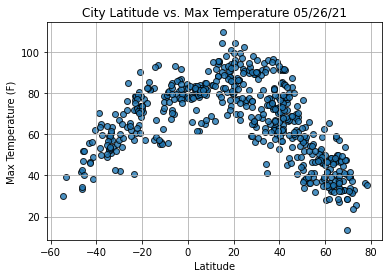

In [23]:
#*****
#6.3.1
#*****

# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [ ]:
#***********************************************************************************
#6.3.2 - Plot Latitude vs. Humidity
#***********************************************************************************

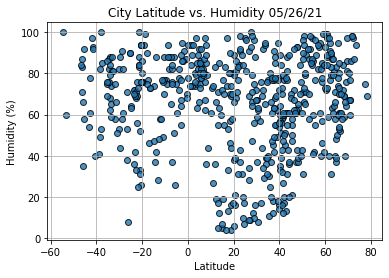

In [24]:
#*****
#6.3.2
#*****

# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

In [ ]:
#***********************************************************************************
#6.3.3 - Plot Latitude vs. Cloudiness
#***********************************************************************************

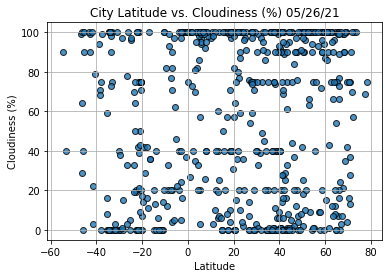

In [25]:
#*****
#6.3.3
#*****

# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

In [ ]:
#***********************************************************************************
#6.3.4 - Plot Latitude vs. Wind Speed
#***********************************************************************************

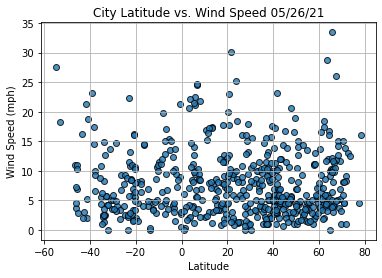

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()